In [1]:
import pandas as pd
import numpy as np
import pickle5 as pickle

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# with open('data/df_boxscores.pkl', "rb") as fh:
#   df_boxscores = pickle.load(fh)
df_boxscores = pd.read_pickle('data/df_boxscores.pkl')
nfl_player_stats_by_career = pd.read_pickle('data/nfl_player_stats_by_career.pkl')
nfl_player_stats_by_season = pd.read_pickle('data/nfl_player_stats_by_season.pkl')
player_game_stats = pd.read_pickle('data/player_game_stats.pkl')
team_season_stats = pd.read_pickle('data/team_season_stats.pkl')

nfl_stadiums = pd.read_csv('data/nfl_stadiums.csv')
nfl_teams = pd.read_csv('data/nfl_teams.csv')

df_boxscores.shape, nfl_player_stats_by_career.shape, nfl_player_stats_by_season.shape, player_game_stats.shape, team_season_stats.shape

((5593, 70), (5429, 107), (27904, 107), (341332, 53), (670, 37))

# Exploring NFL Stadium Data

In [37]:
nfl_stadiums[~nfl_stadiums.isna().any(axis=1)]

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
9,Bank of America Stadium,"Charlotte, NC",1996.0,2016.0,outdoor,"800 S Mint St, Charlotte, NC 28202",28202,moderate,"73,778",Grass,USW00013881,"CHARLOTTE DOUGLAS AIRPORT, NC US",35.22360,-80.95520,221.9
23,FedExField,"Landover, MD",1997.0,2016.0,outdoor,"1600 Fedex Way, Hyattsville, MD 20785",20785,moderate,"79,000",Grass,USC00186350,"NATIONAL ARBORETUM DC, MD US",38.91330,-76.97000,15.2
43,Levi's Stadium,"Santa Clara, CA",2014.0,2016.0,outdoor,"4900 Marie P. DeBartolo Way, Santa Clara, CA 9...",95054,moderate,"68,500",Grass,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",37.61970,-122.36470,2.4
48,LP Stadium,"Nashville, TN",1999.0,2016.0,outdoor,"1 Titans Way, Nashville, TN 37213",37213,moderate,"69,143",Grass,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",36.11889,-86.68917,182.9
62,Nissan Stadium,"Nashville, TN",1999.0,2016.0,outdoor,"1 Titans Way, Nashville, TN 37213",37213,moderate,"69,143",Grass,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",36.11889,-86.68917,182.9
72,Raymond James Stadium,"Tampa, FL",1998.0,2016.0,outdoor,"4201 N Dale Mabry Hwy, Tampa, FL 33607",33607,warm,"65,890",Grass,USW00012842,"TAMPA INTERNATIONAL AIRPORT, FL US",27.96194,-82.54030,5.8


In [39]:
nfl_teams[~nfl_teams.isna().any(axis=1)]

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central
10,Dallas Cowboys,Cowboys,DAL,DAL,NFC,NFC East,NFC,NFC East
11,Denver Broncos,Broncos,DEN,DEN,AFC,AFC West,AFC,AFC West


# Exploring information in each DataFrame to decide which to remove/keep and what else is left to complete

## First df_boxscores:

* Info:

    - **Rows**: Each row is a particular games boxscore with stats from both teams along with additional data regarding the particular game

Index: 5593 entries, 200009030min to 202102070tam
Data columns (total 76 columns):

 #   Column                        Non-Null Count  Dtype 
 
    ---  ------                        --------------  -----         
     0   attendance                    5593 non-null   int64         
     1   away_first_downs              5593 non-null   int64         
     2   away_fourth_down_attempts     5593 non-null   int64         
     3   away_fourth_down_conversions  5593 non-null   int64         
     4   away_fumbles                  5593 non-null   int64         
     5   away_fumbles_lost             5593 non-null   int64         
     6   away_interceptions            5593 non-null   int64         
     7   away_net_pass_yards           5593 non-null   int64         
     8   away_pass_attempts            5593 non-null   int64         
     9   away_pass_completions         5593 non-null   int64         
     10  away_pass_touchdowns          5593 non-null   int64         
     11  away_pass_yards               5593 non-null   int64         
     12  away_penalties                5593 non-null   int64         
     13  away_points                   5593 non-null   int64         
     14  away_rush_attempts            5593 non-null   int64         
     15  away_rush_touchdowns          5593 non-null   int64         
     16  away_rush_yards               5593 non-null   int64         
     17  away_third_down_attempts      5593 non-null   int64         
     18  away_third_down_conversions   5593 non-null   int64         
     `19  away_time_of_possession       5593 non-null   object`        
     20  away_times_sacked             5593 non-null   int64         
     21  away_total_yards              5593 non-null   int64         
     22  away_turnovers                5593 non-null   int64         
     23  away_yards_from_penalties     5593 non-null   int64         
     24  away_yards_lost_from_sacks    5593 non-null   int64         
     25  date                          5593 non-null   object        
     26  datetime                      5593 non-null   datetime64[ns]
     `27  duration                      5592 non-null   object`        
     28  home_first_downs              5593 non-null   int64         
     29  home_fourth_down_attempts     5593 non-null   int64         
     30  home_fourth_down_conversions  5593 non-null   int64         
     31  home_fumbles                  5593 non-null   int64         
     32  home_fumbles_lost             5593 non-null   int64         
     33  home_interceptions            5593 non-null   int64         
     34  home_net_pass_yards           5593 non-null   int64         
     35  home_pass_attempts            5593 non-null   int64         
     36  home_pass_completions         5593 non-null   int64         
     37  home_pass_touchdowns          5593 non-null   int64         
     38  home_pass_yards               5593 non-null   int64         
     39  home_penalties                5593 non-null   int64         
     40  home_points                   5593 non-null   int64         
     41  home_rush_attempts            5593 non-null   int64         
     42  home_rush_touchdowns          5593 non-null   int64         
     43  home_rush_yards               5593 non-null   int64         
     44  home_third_down_attempts      5593 non-null   int64         
     45  home_third_down_conversions   5593 non-null   int64         
     `46  home_time_of_possession       5593 non-null   object`        
     47  home_times_sacked             5593 non-null   int64         
     48  home_total_yards              5593 non-null   int64         
     49  home_turnovers                5593 non-null   int64         
     50  home_yards_from_penalties     5593 non-null   int64         
     51  home_yards_lost_from_sacks    5593 non-null   int64         
     52  losing_abbr                   5593 non-null   object        
     53  losing_name                   5593 non-null   object        
     54  over_or_under                 5593 non-null   object        
     55  over_under                    5593 non-null   object        
     56  over_under_total              5593 non-null   float64       
     57  roof                          5593 non-null   object        
     58  stadium                       5593 non-null   object        
     59  surface                       5593 non-null   object        
     60  time                          5593 non-null   object        
     61  total_minus_over              5593 non-null   float64       
     62  total_points                  5593 non-null   int64         
     63  vegas_line                    5593 non-null   object        
     `64  weather                       4168 non-null   object`        
     65  winner                        5593 non-null   object        
     66  winning_abbr                  5593 non-null   object        
     67  winning_name                  5593 non-null   object        
     68  won_toss                      5593 non-null   object        
     69  day_of_week                   5593 non-null   object        
     70  month                         5593 non-null   object        
     `71  temperature                   4168 non-null   object`        
     `72  humidity                      4149 non-null   object`        
     `73  wind_chill                    2773 non-null   object`        
     74  wind                          5593 non-null   int64         
     75  year                          5593 non-null   object      
     
dtypes: datetime64[ns](1), float64(2), int64(49), object(24)
memory usage: 3.3+ MB

### Decisions to make:

* Which columns to move to index (likely to be keys for Relational Database, probably be all the string columns)
* Make Time of Possesion into DateTime
    - Maybe also have column that compares to opposing team
* What to do with NaNs, thinking of leaving them as they are almost all because the game was played in a dome

In [30]:
df_boxscores.head()

,,,,,,attendance,away_first_downs,away_fourth_down_attempts,away_fourth_down_conversions,away_fumbles,away_fumbles_lost,away_interceptions,away_net_pass_yards,away_pass_attempts,away_pass_completions,away_pass_touchdowns,away_pass_yards,away_penalties,away_points,away_rush_attempts,away_rush_touchdowns,away_rush_yards,away_third_down_attempts,away_third_down_conversions,away_time_of_possession,away_times_sacked,away_total_yards,away_turnovers,away_yards_from_penalties,away_yards_lost_from_sacks,date,datetime,duration,home_first_downs,home_fourth_down_attempts,home_fourth_down_conversions,home_fumbles,home_fumbles_lost,home_interceptions,home_net_pass_yards,home_pass_attempts,home_pass_completions,home_pass_touchdowns,home_pass_yards,home_penalties,home_points,home_rush_attempts,home_rush_touchdowns,home_rush_yards,home_third_down_attempts,home_third_down_conversions,home_time_of_possession,home_times_sacked,home_total_yards,home_turnovers,home_yards_from_penalties,home_yards_lost_from_sacks,losing_abbr,losing_name,over_or_under,over_under_total,time,total_minus_over,total_points,weather,winner,winning_abbr,winning_name,won_toss,day_of_week,month,temperature,humidity,wind_chill,wind
over_under,roof,stadium,surface,vegas_line,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46.5 (over),Dome,Hubert H. Humphrey Metrodome,Astroturf,Minnesota Vikings -4.5,2000,64104,23,0,0,2,1,0,272,41,27,2,290,5,27,25,1,153,15,9,32:34,2,425,1,45,18,"Sunday Sep 3, 2000",2000-09-03 13:00:00,3:08,17,0,0,2,0,1,188,23,13,0,190,4,30,30,3,186,13,6,27:26,1,374,1,20,2,CHI,Chicago Bears,over,46.5,1:00pm,10.5,57,None,Home,MIN,Minnesota Vikings,Vikings,Sunday,Sep,None,None,None,0
44.0 (under),Outdoors,Arrowhead Stadium,Grass,Indianapolis Colts -3.5,2000,78357,20,0,0,1,1,1,267,32,22,1,273,7,27,32,1,119,13,6,33:13,1,386,2,78,6,"Sunday Sep 3, 2000",2000-09-03 13:00:00,2:58,17,1,0,0,0,1,206,37,16,2,212,6,14,24,0,74,15,5,26:47,1,280,1,50,6,KAN,Kansas City Chiefs,under,44.0,1:00pm,-3.0,41,"90 degrees, relative humidity 50%, wind 5 mph,...",Away,CLT,Indianapolis Colts,Chiefs,Sunday,Sep,90,50%,0,5
47.5 (under),Outdoors,FedExField,Grass,Washington Redskins -10.5,2000,80257,12,1,1,1,1,0,124,26,17,1,183,9,17,20,0,112,11,2,26:46,6,236,1,65,59,"Sunday Sep 3, 2000",2000-09-03 13:01:00,3:04,23,1,0,0,0,0,234,36,25,0,234,7,20,31,2,162,12,5,33:14,0,396,0,64,0,CAR,Carolina Panthers,under,47.5,1:01pm,-10.5,37,"80 degrees, relative humidity 98%, no wind, wi...",Home,WAS,Washington Redskins,Redskins,Sunday,Sep,80,98%,0,0
38.5 (under),Outdoors,Cleveland Browns Stadium,Grass,Jacksonville Jaguars -10.5,2000,72418,28,0,0,1,0,0,279,34,24,1,301,1,27,40,2,119,16,10,37:03,4,398,0,5,22,"Sunday Sep 3, 2000",2000-09-03 13:02:00,3:46,9,2,1,1,1,0,153,27,19,1,160,3,7,16,0,96,10,3,22:57,1,249,1,25,7,CLE,Cleveland Browns,under,38.5,1:02pm,-4.5,34,"78 degrees, relative humidity 63%, wind 6 mph,...",Away,JAX,Jacksonville Jaguars,Jaguars,Sunday,Sep,78,63%,0,6
46.5 (over),Dome,Georgia Dome,Astroturf,Atlanta Falcons -6.5,2000,54626,23,1,0,3,0,1,247,36,23,3,253,7,28,24,1,92,9,2,28:21,1,339,1,42,6,"Sunday Sep 3, 2000",2000-09-03 13:02:00,3:13,22,0,0,2,1,0,264,31,16,2,264,4,36,32,0,95,11,4,31:39,0,359,1,51,0,SFO,San Francisco 49ers,over,46.5,1:02pm,17.5,64,None,Home,ATL,Atlanta Falcons,49ers,Sunday,Sep,None,None,None,0


## nfl_player_stats_by_career

* Info:

    - **Rows**: Each row is 1 particular player that has played in the NFL within the last 20 years.
    - **Columns**: Consist of stats from that players career, if no stat exists for a column it is filled with a NaN value

### Decisions to make:

* Positions column, how to seperate based on position played
    - 1 Column with (String or List) that has all positions played by player
    - Many columns with all positions and either a 1 or 0 depending on if the position has been played by the player
* Offense/Defense/Special Teams column
* What to do with NaN values, likely to just leave as NaN

In [7]:
nfl_player_stats_by_career.head()

,,,,,,adjusted_net_yards_per_attempt_index,adjusted_net_yards_per_pass_attempt,adjusted_yards_per_attempt,adjusted_yards_per_attempt_index,all_purpose_yards,approximate_value,assists_on_tackles,attempted_passes,birth_date,blocked_punts,catch_percentage,completed_passes,completion_percentage_index,espn_qbr,extra_point_percentage,extra_points_attempted,extra_points_made,field_goal_percentage,field_goals_attempted,field_goals_made,fifty_plus_yard_field_goal_attempts,fifty_plus_yard_field_goals_made,fourth_quarter_comebacks,fourty_to_fourty_nine_yard_field_goal_attempts,fourty_to_fourty_nine_yard_field_goals_made,fumbles,fumbles_forced,fumbles_recovered,fumbles_recovered_for_touchdown,game_winning_drives,games,games_started,height,interception_percentage,interception_percentage_index,interceptions,interceptions_returned_for_touchdown,interceptions_thrown,kickoff_return_touchdown,kickoff_return_yards,kickoff_returns,less_than_nineteen_yards_field_goal_attempts,less_than_nineteen_yards_field_goals_made,longest_field_goal_made,longest_interception_return,longest_kickoff_return,longest_pass,longest_punt,longest_punt_return,longest_reception,longest_rush,net_yards_per_attempt_index,net_yards_per_pass_attempt,passer_rating_index,passes_defended,passing_completion,passing_touchdown_percentage,passing_touchdowns,passing_yards,passing_yards_per_attempt,punt_return_touchdown,punt_return_yards,punt_returns,punts,qb_record,quarterback_rating,receiving_touchdowns,receiving_yards,receiving_yards_per_game,receiving_yards_per_reception,receptions,receptions_per_game,rush_attempts,rush_attempts_per_game,rush_touchdowns,rush_yards,rush_yards_per_attempt,rush_yards_per_game,rushing_and_receiving_touchdowns,sack_percentage,sack_percentage_index,sacks,safeties,season,tackles,thirty_to_thirty_nine_yard_field_goal_attempts,thirty_to_thirty_nine_yard_field_goals_made,times_pass_target,times_sacked,total_punt_yards,touchdown_percentage_index,touches,twenty_to_twenty_nine_yard_field_goal_attempts,twenty_to_twenty_nine_yard_field_goals_made,weight,yards_from_scrimmage,yards_lost_to_sacks,yards_per_attempt_index,yards_per_completed_pass,yards_per_game_played,yards_per_kickoff_return,yards_per_punt,yards_per_punt_return,yards_per_touch,yards_recovered_from_fumble,yards_returned_from_interception,years_played
name,player_id,position,team_abbreviation,age,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Davante Adams,AdamDa01,WR,GNB,28.0,Career,None,None,None,None,None,62.0,None,None,1992-12-24,None,64.8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5.0,None,None,None,None,100.0,93.0,6-1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,66,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,62,6568,65.7,12.0,546,5.5,None,None,None,None,None,None,62,None,None,None,None,Career,None,None,None,843,None,None,None,546,None,None,215,6568,None,None,None,None,None,None,None,12.0,None,None,7
Montravius Adams,AdamMo00,NaN,,25.0,Career,None,None,None,None,None,5.0,22,None,1995-07-24,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,1.0,1.0,0.0,None,45.0,3.0,6-4,None,None,0.0,0.0,None,None,None,None,None,None,None,0.0,None,None,None,None,None,None,None,None,None,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.5,None,Career,22,None,None,None,None,None,None,None,None,None,304,None,None,None,None,None,None,None,None,None,0.0,0.0,4
Jaire Alexander,AlexJa00,LCB,GNB,23.0,Career,None,None,None,None,85.0,22.0,24,None,1997-02-09,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.0,2,3,0,None,44.0,42.0,5-10,None,None,4,0,None,None,None,None,None,None,None,37,None,None,None,24.0,None,None,None,None,None,41,None,None,None,None,None,0.0,25.0,4.0,None,None,None,None,None,None,None,None,None,None

In [11]:
nfl_player_stats_by_career.index.names

FrozenList(['name', 'player_id', 'position', 'team_abbreviation', 'age', 'year'])

## nfl_player_stats_by_season

* Info:

    - **Rows**: Each row is 1 particular player during a particular season within the last 20 years.
    - **Columns**: Consist of stats from that players season, if no stat exists for a column it is filled with a NaN value

### Decisions to make:

* Positions column, how to seperate based on position played
    - 1 Column with (String or List) that has all positions played by player
    - Many columns with all positions and either a 1 or 0 depending on if the position has been played by the player
* Offense/Defense/Special Teams column
* What to do with NaN values, likely to just leave as NaN|

In [17]:
nfl_player_stats_by_season.head()

adjusted_net_yards_per_attempt_index  \
name          player_id position team_abbreviation age  year                                        
Davante Adams AdamDa01  WR       GNB               22.0 2014                                 None   
                                                   23.0 2015                                 None   
                                                   24.0 2016                                 None   
                                                   25.0 2017                                 None   
                                                   26.0 2018                                 None   

                                                             adjusted_net_yards_per_pass_attempt  \
name          player_id position team_abbreviation age  year                                       
Davante Adams AdamDa01  WR       GNB               22.0 2014                                None   
                                                   23.0 2015                                None   
                                                   24.0 2016                                None   
                                                   25.0 2017                                None   
                                                   26.0 2018                                None   

                                                             adjusted_yards_per_attempt  \
name          player_id position team_abbreviation age  year                              
Davante Adams AdamDa01  WR       GNB               22.0 2014                       None   
                                                   23.0 2015                       None   
                                                   24.0 2016                       None   
                                                   25.0 2017                       None   
                                                   26.0 2018                       None   

                                                             adjusted_yards_per_attempt_index  \
name          player_id position team_abbreviation age  year                                    
Davante Adams AdamDa01  WR       GNB               22.0 2014                             None   
                                                   23.0 2015                             None   
                                                   24.0 2016                             None   
                                                   25.0 2017                             None   
                                                   26.0 2018                             None   

                                                             all_purpose_yards  \
name          player_id position team_abbreviation age  year                     
Davante Adams AdamDa01  WR       GNB               22.0 2014              None   
                                                   23.0 2015              None   
                                                   24.0 2016              None   
                                                   25.0 2017              None   
                                                   26.0 2018              None   

                                                              approximate_value  \
name          player_id position team_abbreviation age  year                      
Davante Adams AdamDa01  WR       GNB               22.0 2014                6.0   
                                                   23.0 2015                4.0   
                                                   24.0 2016               10.0   
                                                   25.0 2017                8.0   
                                                   26.0 2018               10.0   

                                                             assists_on_tackles  \
name          player_id position team_abbreviation age  year                      
Davante Ada

## player_game_stats

* Info:

    - **Index**: Shows `year`, `game_uri` (*string that is a **primary key** for a particular NFL game played during that year*), `team_abbreviation`, `name` (*Players name*)
    - **Rows**: Each row is 1 particular player that has played in the NFL within the last 20 years.
    - **Columns**: Consist of stats from that players boxscore, if no stat exists for a column it is filled with a NaN value

### Decisions to make:

* NaN values, probably keep as NaN
* Wanting to add anything else to index/columns
    - Column showing teams points at the end of a game
        - Perhaps even column showing other teams points, especially for defensive players
    - Positional columns
    - Offense/Defense/Special Teams columns

In [18]:
player_game_stats.head(60)

completed_passes  \
year game_uri     team_abbreviation name                                 
2000 200009030min MIN               Daunte Culpepper                13   
                                    Robert Smith                     0   
                                    Jim Kleinsasser                  0   
                                    Randy Moss                       0   
                                    John Davis                       0   
                                    Cris Carter                      0   
                                    Andrew Jordan                    0   
                                    Moe Williams                     0   
                                    Ed McDaniel                   None   
                                    John Burrough                 None   
                                    Kailee Wong                   None   
                                    Cris Dishman                  None   
                                    Robert Griffith               None   
                                    Talance Sawyer                None   
                                    Robert Tate                   None   
                                    Orlando Thomas                None   
                                    Bryce Paup                    None   
                                    Dwayne Rudd                   None   
                                    Keith Thibodeaux              None   
                                    Tony Williams                 None   
                                    Antonio Banks                 None   
                                    Craig Sauer                   None   
                                    Harold Morrow                 None   
                                    Jim Nelson                    None   
                                    Chris Walsh                   None   
                                    Kenny Wright                  None   
                                    Tyrone Carter                 None   
                                    Gary Anderson                 None   
                                    Mitch Berger                  None   
                  CHI               Cade McNown                     27   
                                    James Allen                      0   
                                    Curtis Enis                      0   
                                    Bobby Engram                     0   
                                    Marcus Robinson                  0   
                                    John Allred                      0   
                                    Eddie Kennison                   0   
                                    Marty Booker                     0   
                                    Macey Brooks                  None   
                                    Alonzo Mayes                  None   
                                    Chris Villarrial              None   
                                    Jerry Azumah                  None   
                                    Phillip Daniels               None   
                                    Paul Edinger                  None   
                                    Warrick Holdman               None   
                                    Tony Parrish                  None   
                                    Mike Wells                    None   
                                    Barry Minter                  None   
                                    Thomas Smith                  None   
                                    Mike Brown                    None   
                                    Walt Harris                   None   
                                    Bryan Robinson                None   
                                    Khari Samuel                  None   
                                    Brian Urlacher        

## team_season_stats

* Info:

    - **Rows**: Each row is 1 particular team throughout 1 particular year in the NFL within the last 20 years.

### Decisions to make:

* NaN values for `post_season_result`, leaving as NaN makes most sense to me
* Wanting to add anything else to index/columns
    - Adding teams Division that they play in

In [27]:
team_season_stats.head()

,,,,,,defensive_simple_rating_system,first_downs,first_downs_from_penalties,fumbles,games_played,interceptions,losses,margin_of_victory,offensive_simple_rating_system,pass_attempts,pass_completions,pass_first_downs,pass_net_yards_per_attempt,pass_touchdowns,pass_yards,penalties,percent_drives_with_points,percent_drives_with_turnovers,plays,points_against,points_contributed_by_offense,points_difference,points_for,rush_attempts,rush_first_downs,rush_touchdowns,rush_yards,rush_yards_per_attempt,simple_rating_system,strength_of_schedule,turnovers,win_percentage,wins,yards,yards_from_penalties,yards_per_play,coaches_through_season
team_abbreviation,team_name,rank,post_season_result,year,coach,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RAM,St. Louis Rams,1,Lost WC,2000,Mike Martz,-9.5,380,21,12,16,23,6,4.3,12.6,587,380,247,8.3,37,5232,111,46.8,16.7,1014,471,49.41,69,540,383,112,26,1843,4.8,3.1,-1.2,35,0.625,10,7075,942,7.0,1
DEN,Denver Broncos,2,Lost WC,2000,Mike Shanahan,-2.7,383,36,13,16,12,5,7.3,7.8,569,354,223,7.1,28,4243,89,38.3,11.7,1115,369,-40.21,116,485,516,124,21,2311,4.5,5.0,-2.2,25,0.688,11,6554,792,5.9,1
RAI,Oakland Raiders,3,Lost Conference Championship,2000,Jon Gruden,1.8,337,32,9,16,11,4,11.3,8.0,475,284,177,6.6,28,3306,118,39.2,10.6,1023,299,11.03,180,479,520,128,23,2470,4.8,9.7,-1.5,20,0.750,12,5776,940,5.6,1
CLT,Indianapolis Colts,4,Lost WC,2000,Jim Mora,0.8,357,33,14,16,15,6,6.4,7.1,571,357,213,7.2,33,4282,89,40.4,15.2,1026,326,47.85,103,429,435,111,14,1859,4.3,7.9,1.5,29,0.625,10,6141,866,6.0,1
MIN,Minnesota Vikings,5,Lost Conference Championship,2000,Dennis Green,-2.3,319,19,10,16,18,5,1.6,4.3,495,307,193,7.2,33,3832,106,39.7,14.9,958,371,-60.12,26,397,428,107,14,2129,5.0,1.9,0.3,28,0.688,11,5961,908,6.2,1


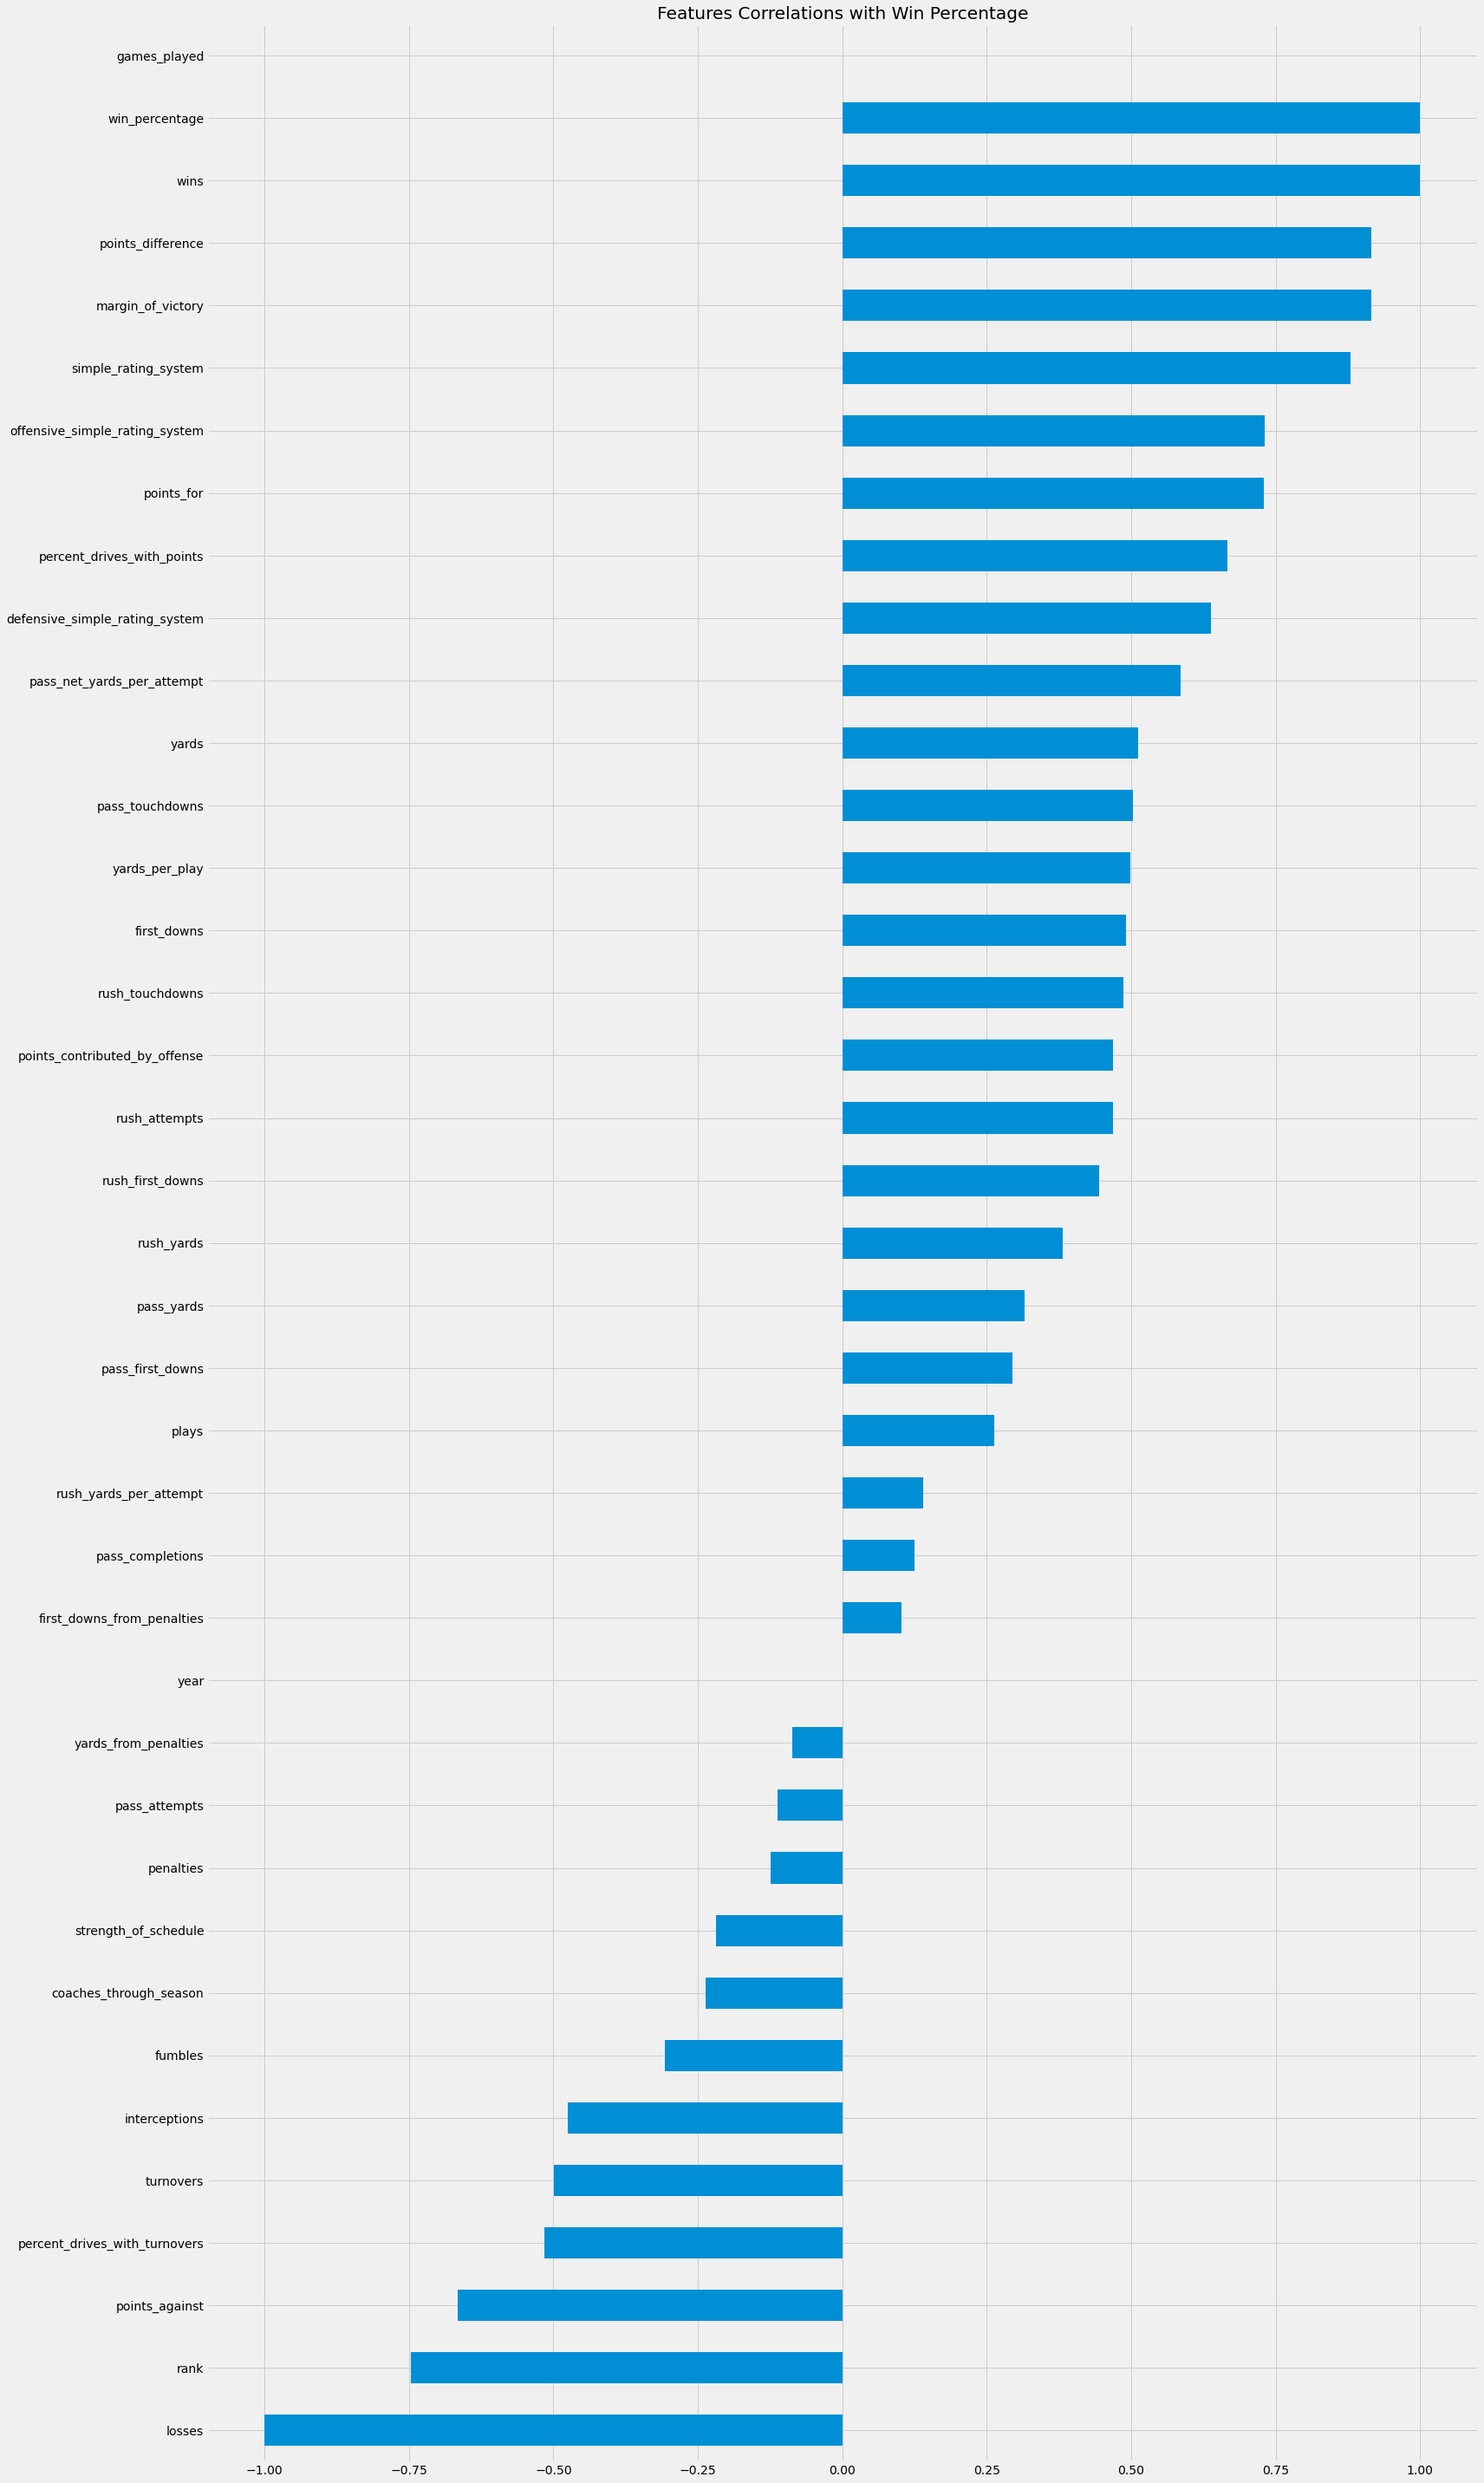

In [14]:
corr_matrix = team_season_stats.corr()
corr_matrix['win_percentage'].sort_values(ascending=True).plot(title='Features Correlations with Win Percentage', kind='barh', figsize=(24,40))
plt.tight_layout()

In [24]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = team_season_stats.select_dtypes('number')

scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.transform(X)

X.shape

(670, 39)

In [25]:
pca = PCA()
pca.fit(scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

13

/home/luke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


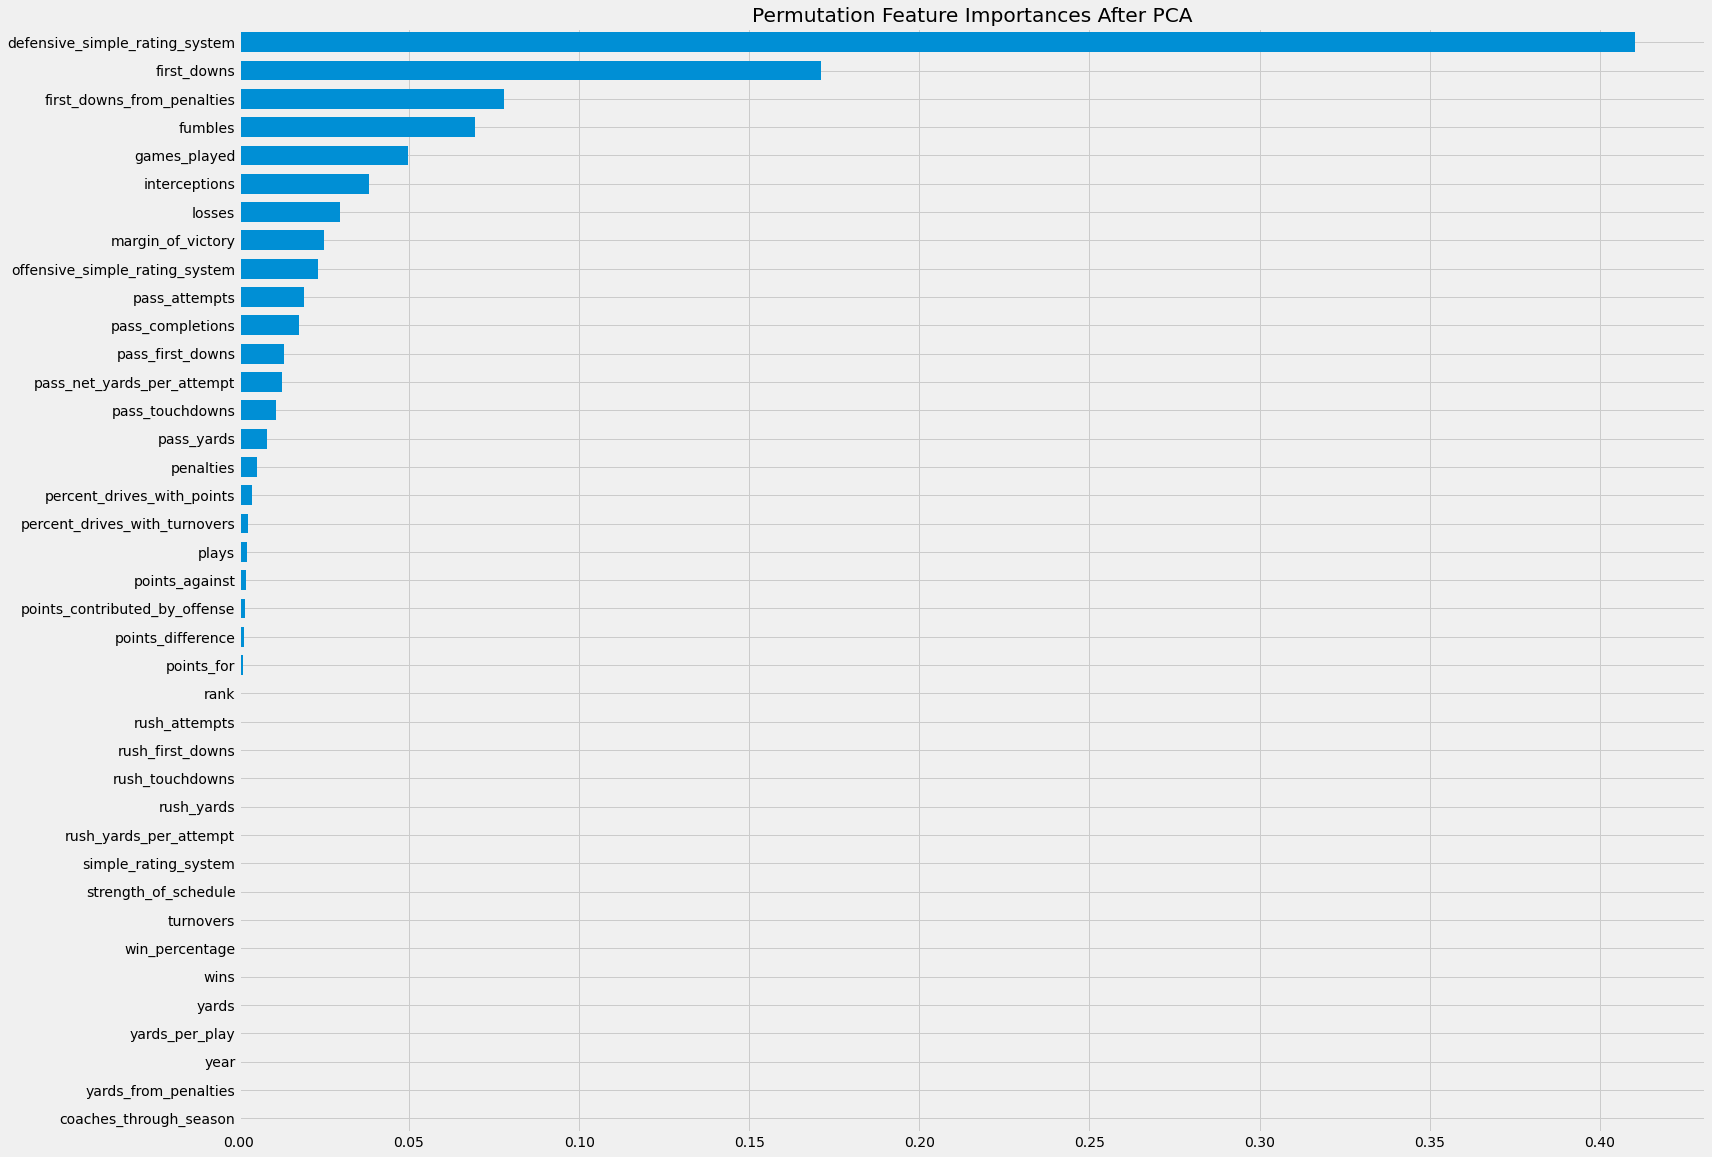

In [28]:
result = permutation_importance(pca, scaled, y=None,n_repeats=10)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(pca.explained_variance_ratio_)
tree_indices = np.arange(0, len(pca.explained_variance_ratio_)) + 0.5

fig, ax = plt.subplots(figsize=(24, 16))
ax.barh(tree_indices,
         pca.explained_variance_ratio_[tree_importance_sorted_idx], height=0.7)
ax.set_yticklabels(X.columns[tree_importance_sorted_idx])
ax.set_yticks(tree_indices)
ax.set_ylim((0, len(pca.explained_variance_ratio_)))

fig.tight_layout()
plt.title('Permutation Feature Importances After PCA')
plt.show()